In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.datasets import load_iris,load_wine

Dataset: Atom
Data shape: (800, 3)


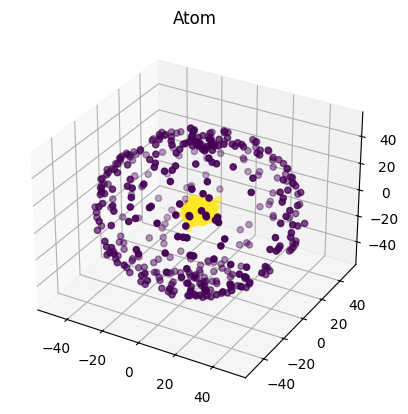

Dataset: Chainlink
Data shape: (1000, 3)


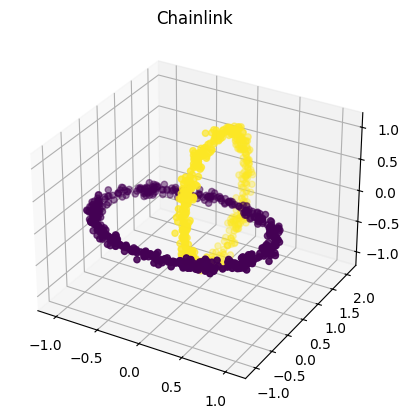

Dataset: EngyTime
Data shape: (4096, 2)


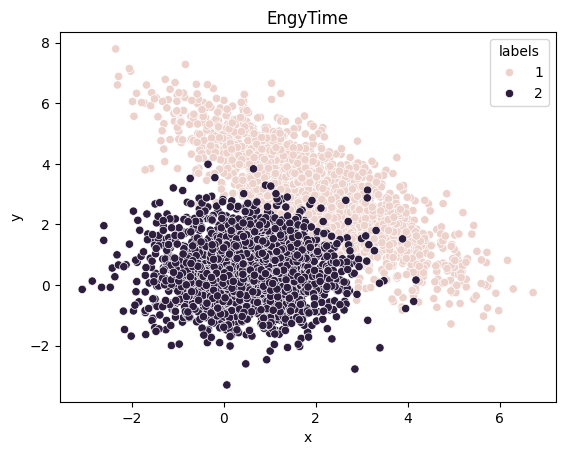

Dataset: Hepta
Data shape: (212, 3)


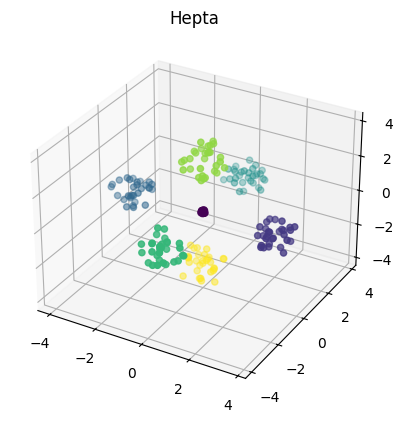

Dataset: Tetra
Data shape: (400, 3)


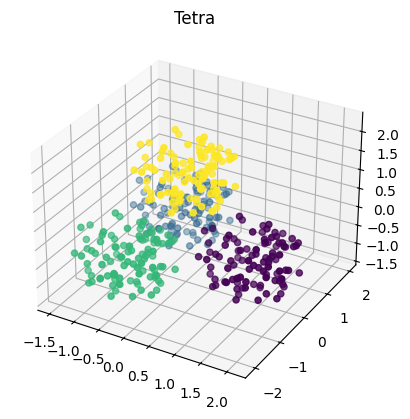

Dataset: Target
Data shape: (770, 2)


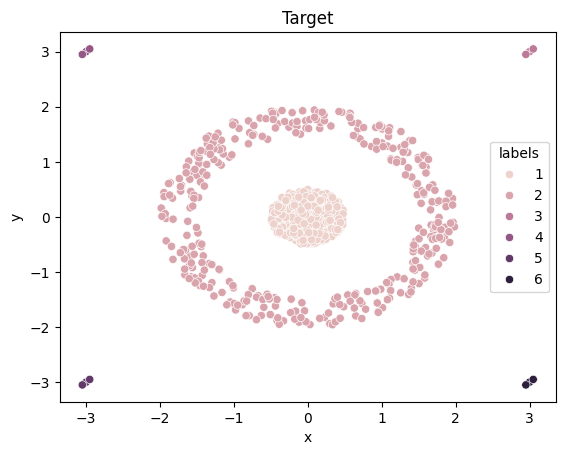

Dataset: TwoDiamonds
Data shape: (800, 2)


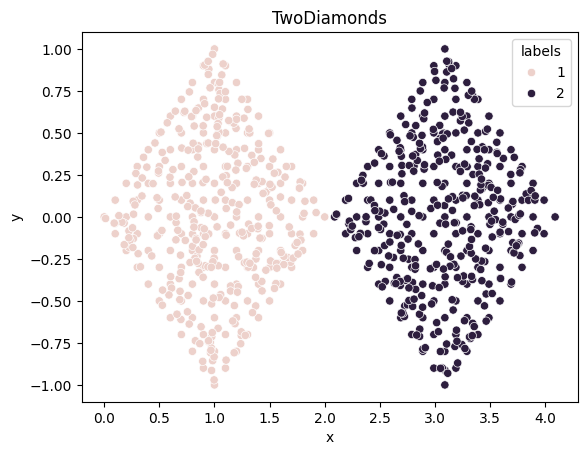

Dataset: WingNut
Data shape: (1016, 2)


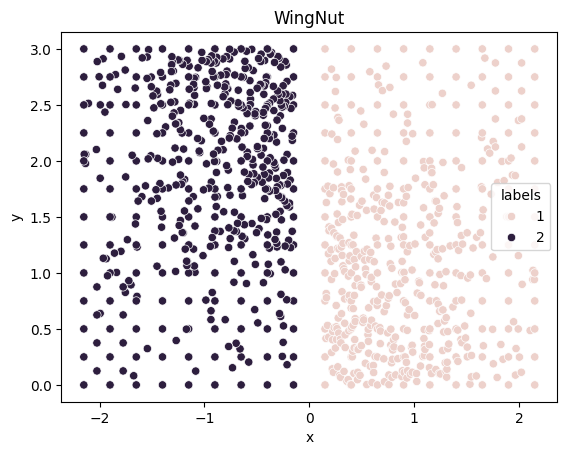

Dataset: Iris
Data shape: (150, 4)


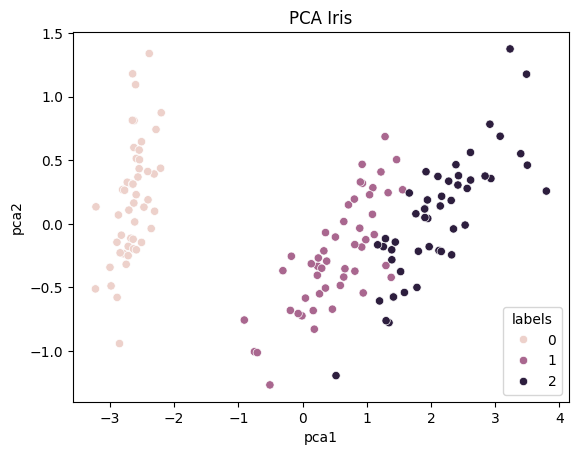

Dataset: Wine
Data shape: (178, 13)


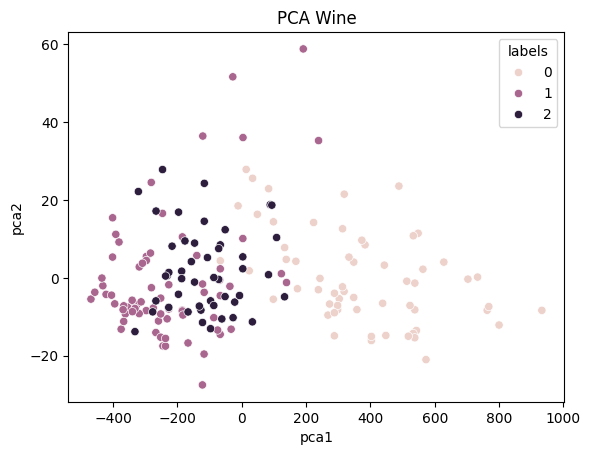

Dataset: Uniform
Data shape: (500, 2)


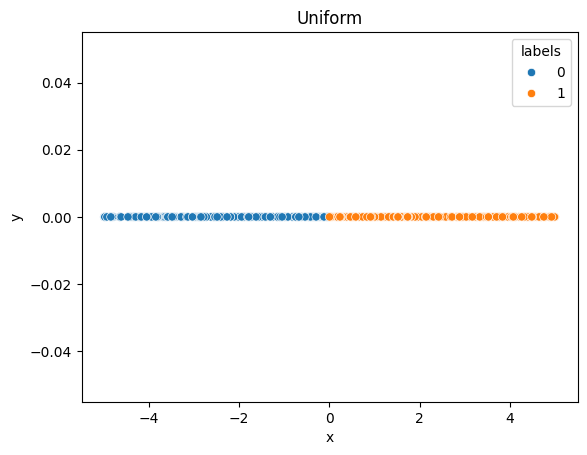

Dataset: Rectangle
Data shape: (1263, 2)


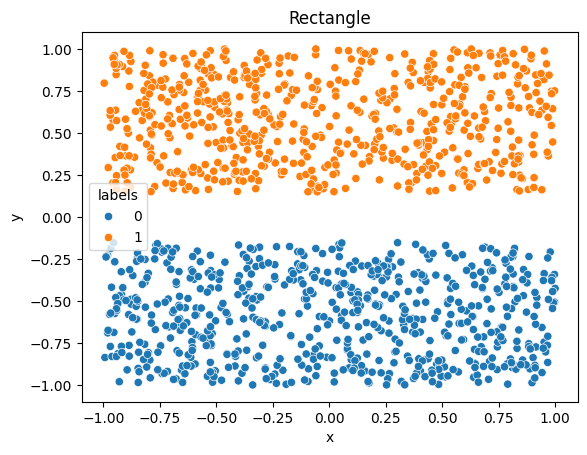

Dataset: Gaussian
Data shape: (500, 2)


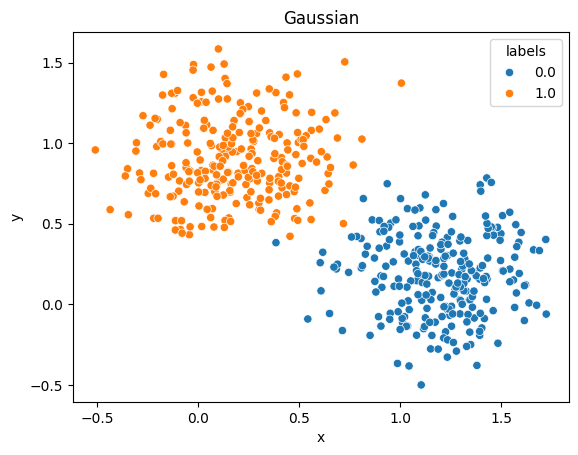

Dataset: GaussianMix
Data shape: (600, 2)


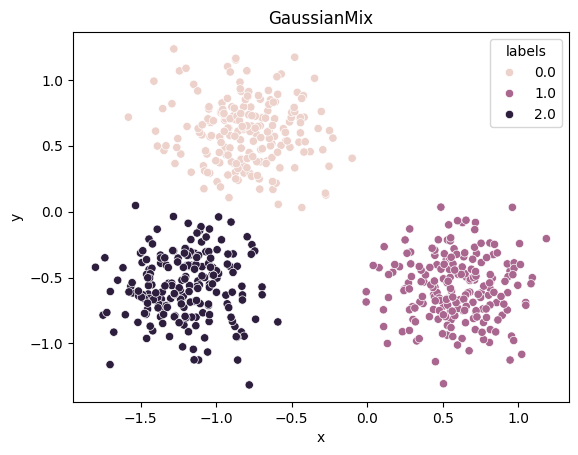

In [23]:
atom = pd.read_csv('data/Atom_Data.csv')
atom_labels = pd.read_csv('data/Atom_Labels.csv')
chainlink = pd.read_csv('data/Chainlink_Data.csv')
chainlink_labels = pd.read_csv('data/Chainlink_Labels.csv')
engytime = pd.read_csv('data/EngyTime_Data.csv')
engytime_labels = pd.read_csv('data/EngyTime_Labels.csv')
hepta = pd.read_csv('data/Hepta_Data.csv')
hepta_labels = pd.read_csv('data/Hepta_Labels.csv')
tetra = pd.read_csv('data/Tetra_Data.csv')
tetra_labels = pd.read_csv('data/Tetra_Labels.csv')
target = pd.read_csv('data/Target_Data.csv')
target_labels = pd.read_csv('data/Target_Labels.csv')
two_diamonds = pd.read_csv('data/TwoDiamonds_Data.csv')
two_diamonds_labels = pd.read_csv('data/TwoDiamonds_Labels.csv')
wing_nut = pd.read_csv('data/WingNut_Data.csv')
wing_nut_labels = pd.read_csv('data/WingNut_Labels.csv')
# Cargamos los datasets clasico de sklearn
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_labels = pd.DataFrame(iris.target, columns=['target'])
wine = load_wine()
wine_data = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_labels = pd.DataFrame(wine.target, columns=['target'])
# Cargamos los datasets de prueba de la tesis
uniform = pd.read_csv('data/uniform_df.csv')
uniform_data = uniform.drop(columns=['labels'])
uniform_labels = pd.DataFrame(uniform['labels'])
rectangle = pd.read_csv('data/rectangle_df.csv')
rectangle_data = rectangle.drop(columns=['labels'])
rectangle_labels = pd.DataFrame(rectangle['labels'])
gaussian = pd.read_csv('data/gaussian_df.csv')
gaussian_data = gaussian.drop(columns=['labels'])
gaussian_labels = pd.DataFrame(gaussian['labels'])
gaussian_mix = pd.read_csv('data/gaussian_mix_df.csv')
gaussian_mix_data = gaussian_mix.drop(columns=['labels'])
gaussian_mix_labels = pd.DataFrame(gaussian_mix['labels'])
datasets = [
    {
        'name': 'Atom',
        'data': atom,
        'labels': atom_labels,
        'n_clusters': atom_labels.nunique().values[0]
    },{
        'name': 'Chainlink',
        'data': chainlink,
        'labels': chainlink_labels,
        'n_clusters': chainlink_labels.nunique().values[0]
    },{
        'name': 'EngyTime',
        'data': engytime,
        'labels': engytime_labels,
        'n_clusters': engytime_labels.nunique().values[0]
    },{
        'name': 'Hepta',
        'data': hepta,
        'labels': hepta_labels,
        'n_clusters': hepta_labels.nunique().values[0]
    },{
        'name': 'Tetra',
        'data': tetra,
        'labels': tetra_labels,
        'n_clusters': tetra_labels.nunique().values[0]
    },{
        'name': 'Target',
        'data': target,
        'labels': target_labels,
        'n_clusters': target_labels.nunique().values[0]
    },{
        'name': 'TwoDiamonds',
        'data': two_diamonds,
        'labels': two_diamonds_labels,
        'n_clusters': two_diamonds_labels.nunique().values[0]
    },{
        'name': 'WingNut',
        'data': wing_nut,
        'labels': wing_nut_labels,
        'n_clusters': wing_nut_labels.nunique().values[0]
    },{
        'name': 'Iris',
        'data': iris_data,
        'labels': iris_labels,
        'n_clusters': 3
    },{
        'name': 'Wine',
        'data': wine_data,
        'labels': wine_labels,
        'n_clusters': 3
    },{
        'name': 'Uniform',
        'data': uniform_data,
        'labels': uniform_labels,
        'n_clusters': uniform_labels.nunique().values[0]
    },{
        'name': 'Rectangle',
        'data': rectangle_data,
        'labels': rectangle_labels,
        'n_clusters': rectangle_labels.nunique().values[0]
    },{
        'name': 'Gaussian',
        'data': gaussian_data,
        'labels': gaussian_labels,
        'n_clusters': gaussian_labels.nunique().values[0]
    },{
        'name': 'GaussianMix',
        'data': gaussian_mix_data,
        'labels': gaussian_mix_labels,
        'n_clusters': gaussian_mix_labels.nunique().values[0]
    }
]



for dataset in datasets:
    data = dataset['data']
    labels = dataset['labels']
    print(f"Dataset: {dataset['name']}")
    print(f"Data shape: {data.shape}")

    if data.shape[1] > 3:
        pca = PCA(n_components=2)
        data_pca = pca.fit_transform(data)
        data_pca = pd.DataFrame(data_pca, columns=['pca1', 'pca2'])
        data_pca['labels'] = labels
        sns.scatterplot(x='pca1', y='pca2', hue='labels', data=data_pca)
        plt.title(f"PCA {dataset['name']}")
        plt.show()
    elif data.shape[1] == 3:
        data.columns = ['x', 'y', 'z']
        data['labels'] = labels
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(data['x'], data['y'], data['z'], c=data['labels'], cmap='viridis')
        plt.title(f"{dataset['name']}")
        plt.show()
    else:
        #rename columns
        data.columns = ['x', 'y']
        data['labels'] = labels
        sns.scatterplot(x='x', y='y', hue='labels', data=data)
        plt.title(f"{dataset['name']}")
        plt.show()


